# Supervised Machine Learning on Suicide Rate

## Problem Statement
Predicting suicide rates can help identify groups with high suicide tendency so that more support can be given targetedly to this group to lower the suicide rate.

__Aim of this data analysis :__

- To investigate which supervised machine learning technique can best predict suicide rate.
- To investigate which features from the data have significant contribution to the suicide rate.
- To investigate if suicide rate correlates to wealth of a country.

## Data Set
Suicide Rates Overview 1985 to 2016 from Kaggle

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

### Importing libraries

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Importing the data set

In [27]:
df = pd.read_csv('SuicideRate.csv')

## Data Exploration

In [28]:
df.sample(3)

country  year     sex          age  suicide_no  population  \
22915    Slovakia  2003  female   5-14 years           0      339408   
9480      Georgia  1992  female   5-14 years           0      422700   
15648  Luxembourg  2013  female  25-34 years           2       39688   

       suicideno_per100kpop    country-year  HDI_for_year  gdp_for_year  \
22915                  0.00    Slovakia2003           NaN  4.673177e+10   
9480                   0.00     Georgia1992           NaN  3.690329e+09   
15648                  5.04  Luxembourg2013          0.89  6.173935e+10   

       gdp_per_capita  generation  
22915            9138  Millenials  
9480              740  Millenials  
15648          120423  Millenials

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country                 27820 non-null object
year                    27820 non-null int64
sex                     27820 non-null object
age                     27820 non-null object
suicide_no              27820 non-null int64
population              27820 non-null int64
suicideno_per100kpop    27820 non-null float64
country-year            27820 non-null object
HDI_for_year            8364 non-null float64
gdp_for_year            27820 non-null float64
gdp_per_capita          27820 non-null int64
generation              27820 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


__Data set has 12 columns and 27820 rows in total.__

No missing values for all columns except 'HDI_for_year', which 70% of the data is null. Therefore, we can remove 'HDI_for_year'.

'country', 'country-year' and 'year' are not our concerns for this investigation, therefore we will remove them as well.

In [30]:
to_drop = ['HDI_for_year','country','country-year','year']
df = df.drop(df[to_drop],axis=1)
df.sample(3)

sex          age  suicide_no  population  suicideno_per100kpop  \
19913  female  25-34 years           6      273756                  2.19   
3483     male  15-24 years         113      745800                 15.15   
19442    male  25-34 years          93      714020                 13.02   

       gdp_for_year  gdp_per_capita    generation  
19913  8.032231e+10           22874  Generation X  
3483   1.631680e+11           17509  Generation X  
19442  1.076030e+11           11445       Boomers

## Data Dictionary and Cleaning

- __Country:__ name of 101 countries of the dataset
- __year:__ between 1985 - 2016
- __sex:__ gender of the victim
- __age:__ age group of victim
- __suicide_no:__ number of victim of specific gender and age group in given year
- __population:__ size of the population of the particular sex-age group
- __suicideno_per100kpop:__ (Suicides no / population) x 100,000
- __country-year:__ format(CountryYYYY)
- __HDI_for_year:__ Human Development Index in given year
- __gdp_for_year:__ GDP in USD
- __gdp_per_capita:__ GDP divided by total population of the country
- __generation:__ Boomers, G.I. Generation, Generation X, Generation Z, Millenials, Silent


### Duplicating dependent variable

>A country's suicide rate is determined by its number of deaths per 100,000 population officially recorded as suicides.

- __suicide_no :__           Suicide number
- __suicideno_per100kpop :__ Suicide number per 100k population = suicide_no/population = Suicide rate

From these two features, we will select 'suicideno_per100kpop' as it better represents the suicide rate.

In [31]:
to_drop = ['suicide_no']
df = df.drop(df[to_drop],axis=1)
df.sample(3)

sex          age  population  suicideno_per100kpop  gdp_for_year  \
11662  male   5-14 years      499016                  0.40  1.228790e+11   
14324  male  35-54 years      482228                  3.73  3.813755e+10   
1038   male  15-24 years      320000                  1.25  1.596969e+09   

       gdp_per_capita    generation  
11662           13087  Generation Z  
14324           17668       Boomers  
1038              458  Generation X

### Categorizing the dependent variable

__Suicide number per 100k population :__ 
- 0 = Less than 3 suicides = Low suicide rate
- 1 = More or equal to 3, and less than 15 suicides = Medium suicide rate
- 2 = Above 15 suicides = High suicide rate

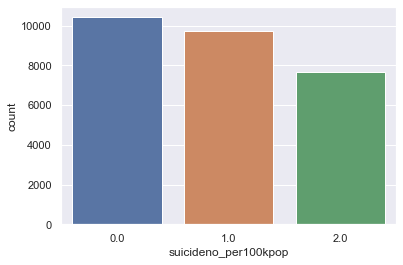

In [32]:
df_cat = df

df_cat.loc[df['suicideno_per100kpop'] < 3, 'suicideno_per100kpop'] = 0
df_cat.loc[(df['suicideno_per100kpop'] >= 3) & (df['suicideno_per100kpop'] <15), 'suicideno_per100kpop'] = 1
df_cat.loc[(df['suicideno_per100kpop'] >= 15), 'suicideno_per100kpop'] = 2

sns.set(style="darkgrid")
ax = sns.countplot(x="suicideno_per100kpop", data=df)

##### As we can see from graph above, the difference in count between the different categories are not very large. 

__Sex :__
- 0 = Male
- 1 = Female

In [33]:
dict_sex = {
    'male':0,
    'female':1
}

df['sex']=df['sex'].map(dict_sex)

__Age :__

- 0 = 5-14 years
- 1 = 15-24 years
- 2 = 25-34 years
- 3 = 35-54 years
- 4 = 55-74 years
- 5 = 75+ years

In [34]:
dict_age = {
    '5-14 years': 0,
    '15-24 years': 1,
    '25-34 years': 2,
    '35-54 years': 3,
    '55-74 years': 4,
    '75+ years': 5
}

df['age']=df['age'].map(dict_age)

__Generation :__

- 0 = Generation Z
- 1 = Millenials
- 2 = Generation X
- 3 = Boomers
- 4 = Silent
- 5 = G.I. Generation

In [35]:
dict_generation = {
    'Generation Z': 0,
    'Millenials': 1,
    'Generation X': 2,
    'Boomers': 3,
    'Silent': 4,
    'G.I. Generation': 5
}

df['generation']=df['generation'].map(dict_generation)

df.sample(3)

sex  age  population  suicideno_per100kpop  gdp_for_year  \
18416    1    2      264433                   0.0  1.369398e+10   
179      1    0      298477                   0.0  5.746946e+09   
16800    1    3    11144750                   0.0  7.822410e+11   

       gdp_per_capita  generation  
18416            4790           2  
179              2021           1  
16800            8217           3

### Duplicating features

>A country’s Gross Domestic Product (__GDP__) per person is obtained by dividing its GDP for a particular period by its average population for the year. Per capita GDP serves as an informal measure of a nation’s prosperity.

- __gdp_for_year :__         Country GDP (USD) for specific year
- __gdp_per_capita :__       Country GDP (USD) per capita = GDP/country total population

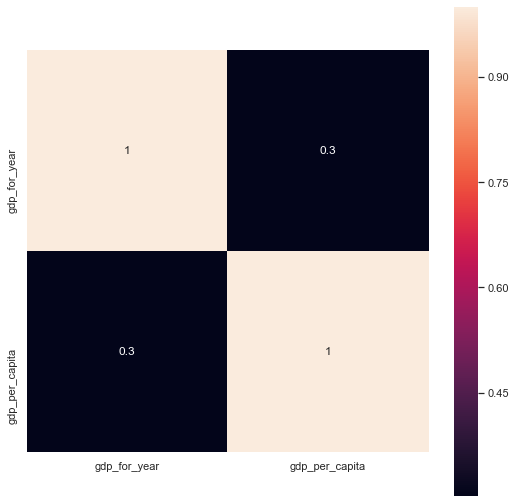

In [36]:
f= ['gdp_for_year','gdp_per_capita']

plt.figure(figsize=(9,9))
heat = sns.heatmap(df[f].corr(), square=True, annot=True)

We will select 'gdp_per_capita' as it better represents the wealth of a country than 'gdp_for_year'.

In [37]:
to_drop = ['gdp_for_year']
df = df.drop(df[to_drop],axis=1)
df.sample(3)

sex  age  population  suicideno_per100kpop  gdp_per_capita  generation
23882    1    4     5008921                   1.0           31171           3
8027     1    5      215613                   0.0            6364           4
15860    0    4       24600                   2.0            6539           5

### Data Scaling

>If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

We shall scale the data since our 'population' and 'gdp_per_capita' have significantly larger magnitude.

In [38]:
features = ['sex','age','population','gdp_per_capita','generation']
dependent = ['suicideno_per100kpop']

x = df.loc[:,features].values
y = df.loc[:,dependent].values
x = StandardScaler().fit_transform(x)

df = pd.DataFrame(data=x, columns=features)

df.sample(3)

sex       age  population  gdp_per_capita  generation
16260  1.0 -0.294648   -0.446785       -0.731789    0.269265
1943  -1.0  0.877204   -0.289017        0.640937    0.972378
15915  1.0  1.463130   -0.469435       -0.468277    1.675491

## Data Visualization

### Correlation Map

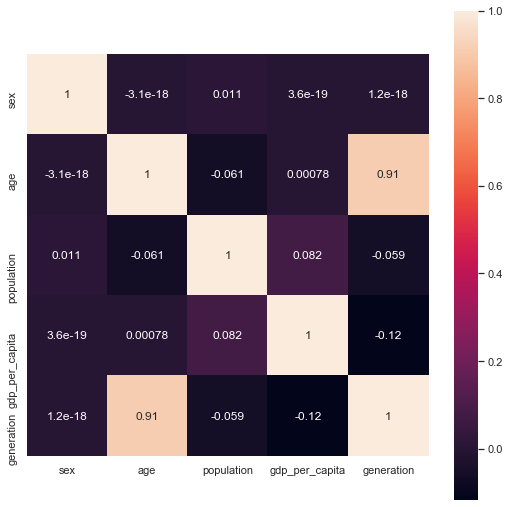

In [39]:
plt.figure(figsize=(9,9))
heat = sns.heatmap(df[features].corr(), square=True, annot=True)

## Supervised Machine Learning

__Supervised techniques used :__
1. Logistic Regression
2. Support Vector Machine
3. K-Nearest Neighbour
4. Decision Tree
5. Random Forest

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

### Training

In [41]:
x = df[['age','sex','gdp_per_capita','generation','population']]
y=y.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

### Logistic Regression

In [42]:
logReg = LogisticRegression(solver = 'lbfgs')
t0=time()
logReg.fit(x_train, y_train)
print('Duration of training : %0.4f s' % (time()-t0))

Duration of training : 0.0962 s


C:\Users\Lenovo\Anaconda3\envs\sa48\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
y_pred = logReg.predict (x_test)
accuracy_score(y_test, y_pred)

0.5754133716750539

In [44]:
for i in range(25):
    print(y_pred[i])

0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
1.0
0.0
0.0
2.0
2.0


Logistics regression model coefficients

In [45]:
print(logReg.coef_)
print(logReg.intercept_)

[[-0.88291085  0.5995505  -0.27449652 -0.05020316 -0.31310094]
 [ 0.31287827  0.34924829  0.06170786 -0.15335143  0.15397623]
 [ 0.77169578 -1.31727343  0.22222273  0.27435835  0.11815375]]
[-0.66226824 -0.64395228 -1.49142569]


We now test the accuracy scores of Support Vector Machine, K-Nearest Neighbour, Decision Tree and Random Forest by changing the hyperparameters.

### Support Vector Machine

We define a function that can build the SVM model based on what we give it and print its accuracy score. 

In [46]:
from time import time
def svmScore(c = 1, gam = 'scale', ker ='rbf'):
    svMachine = SVC(C = c, kernel = ker, gamma = gam)
    t0=time()
    svMachine.fit(x_train, y_train)
    y_pred = svMachine.predict(x_test)  
    accuracy_svm=accuracy_score(y_test, y_pred)
    print(accuracy_svm,' Training done in %0.4f s' % (time()-t0),' C:',c,' gamma:',gam)
    return accuracy_svm

In [47]:
for i in range(25):
    print(y_pred[i])

0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
1.0
0.0
0.0
2.0
2.0


We now compare accuracy scores of different kernels, where default gamma is 1/n features

In [48]:
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    svmScore(ker = k)

0.5856218547807333  Training done in 24.9642 s  C: 1  gamma: scale
0.6694464414090582  Training done in 31.7460 s  C: 1  gamma: scale
0.60862688713156  Training done in 33.3391 s  C: 1  gamma: scale


##### 'Rbf' kernel produces the highest score. 

In [49]:
res = []

c_value=[0.1,1,10,100]
gamma_value=[0.001,0.01,0.1,1,10]

for c in c_value:
    for gam in gamma_value:
        accuracy=svmScore(c = c, gam =gam, ker ='rbf')
        res.append({'accuracy_score':accuracy,'c_value':c,'gamma_value':gam})
table_compare = pd.DataFrame(res)

0.5606038820992092  Training done in 40.7355 s  C: 0.1  gamma: 0.001
0.5933860531991373  Training done in 36.5404 s  C: 0.1  gamma: 0.01
0.6529115744069015  Training done in 31.8951 s  C: 0.1  gamma: 0.1
0.6708842559309849  Training done in 31.2515 s  C: 0.1  gamma: 1
0.6596693026599568  Training done in 37.1499 s  C: 0.1  gamma: 10
0.5794392523364486  Training done in 35.2706 s  C: 1  gamma: 0.001
0.6277498202731847  Training done in 33.8292 s  C: 1  gamma: 0.01
0.6652767792954709  Training done in 31.1865 s  C: 1  gamma: 0.1
0.6900071890726096  Training done in 31.7102 s  C: 1  gamma: 1
0.7043853342918763  Training done in 36.3920 s  C: 1  gamma: 10
0.5930984902947519  Training done in 35.8895 s  C: 10  gamma: 0.001
0.6517613227893602  Training done in 33.7424 s  C: 10  gamma: 0.01
0.6705966930265995  Training done in 38.5735 s  C: 10  gamma: 0.1
0.6960460100647017  Training done in 41.1640 s  C: 10  gamma: 1
0.7304097771387491  Training done in 46.5650 s  C: 10  gamma: 10
0.62918763

In [50]:
table_compare.sort_values('accuracy_score',ascending=False).head()

accuracy_score  c_value  gamma_value
19        0.742775    100.0         10.0
14        0.730410     10.0         10.0
18        0.709130    100.0          1.0
9         0.704385      1.0         10.0
13        0.696046     10.0          1.0

##### Kernel = 'rbf', C = 100, gamma = 10 are suitable hyperparameters for SVM where accuracy= 0.7427, however training time is quite long. 

In [51]:
svClassifier = SVC(C = 100, kernel = 'rbf', gamma = 10)

t0=time()
svClassifier.fit(x_train, y_train)
svm_time=time()-t0
print('SVM Duration of training : %0.4f s' % svm_time)

svm_y_pred = svClassifier.predict(x_test)
svm_accuracy_score=accuracy_score(y_test, svm_y_pred)
print('SVM accuracy:',svm_accuracy_score)

SVM Duration of training : 96.0261 s
SVM accuracy: 0.7427749820273185


### K-Nearest-Neighbour

We choose a small odd number for k, k=3 

In [52]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 
t0=time()
knn_model.fit(x_train, y_train)
knn_time=time()-t0
print('Duration of training : %0.4f s' % knn_time)

knn_y_pred = knn_model.predict(x_test) # let the model predict the test data
knn_accuracy_score=accuracy_score(y_test, knn_y_pred)
print('SVM accuracy:',knn_accuracy_score)

Duration of training : 0.0248 s
SVM accuracy: 0.7446441409058232


In [53]:
for i in range(25):
    print(y_pred[i])

0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
1.0
0.0
0.0
2.0
2.0


In [54]:
acuScore = []
testParam = np.arange(1, 20, 1)
for i in testParam:
    knn_1 = KNeighborsClassifier(n_neighbors = i)
    knn_1.fit(x_train, y_train)
    y_pred1 = knn_1.predict(x_test)
    acuScore.append(accuracy_score(y_test, y_pred1))
    print(accuracy_score(y_test, y_pred1))

0.7363048166786484
0.7258087706685837
0.7446441409058232
0.7367361610352264
0.7398993529834651
0.7384615384615385
0.7371675053918044
0.7292595255212078
0.7342918763479511
0.7318475916606758
0.7285406182602444
0.7250898634076204
0.7253774263120057
0.7199137311286844
0.7183321351545651
0.7150251617541337
0.7091301222142343
0.7076923076923077
0.7089863407620417


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'n_neighbors')]

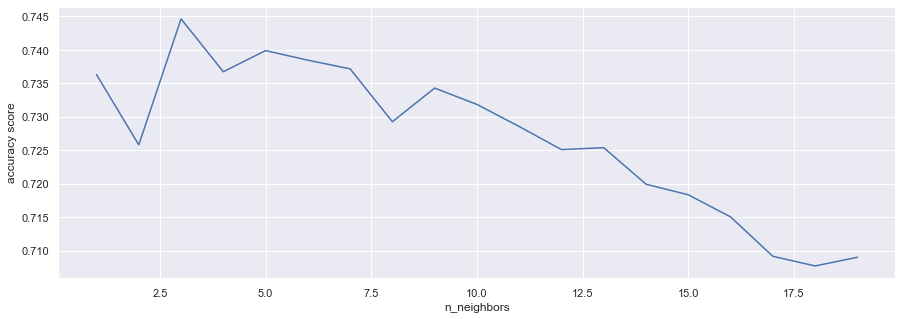

In [55]:
fig, ax = plt.subplots(figsize = (15,5))


ax.plot(testParam, acuScore)
ax.set(xlabel = 'n_neighbors', ylabel = 'accuracy score')

##### As we can see from graph above, n_neighbors = 3 produces the best result with accuracy=0.7446.

### Decision Tree

We define a function to do the tree building and print out the accuracy score.

In [56]:
def decTreeScore(crit = 'gini', maxDepth = None, minSamples = 1, minSplit = 2):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 0)
    dect.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, dect.predict(x_test))
    y_pred=dect.predict(x_test)
    print(accuracy)
    return accuracy

In [57]:
decTreeScore()

0.7480948957584471


0.7480948957584471

In [58]:
for i in range(25):
    print(y_pred[i])

0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
1.0
0.0
0.0
2.0
2.0


We now find out the optimal values of 'max depth', 'min split' and 'min samples' using the 'gini' criterion.

In [59]:
acuScore = []
testParam = np.arange(1, 30, 1)
for i in testParam:
    acuScore.append(decTreeScore(maxDepth = i))

0.5104241552839683
0.6142343637670741
0.6562185478073329
0.6710280373831776
0.682099209202013
0.690294751976995
0.6884255930984903
0.6905823148813803
0.7045291157440691
0.7164629762760604
0.7256649892163911
0.7406182602444285
0.7446441409058232
0.7491013659237958
0.7538461538461538
0.7492451473759885
0.7480948957584471
0.7499640546369518
0.7521207764198419
0.7472322070452911
0.7509705248023005
0.7522645578720345
0.7525521207764199
0.7548526240115025
0.7495327102803738
0.7538461538461538
0.7515456506110711
0.7506829618979152
0.7534148094895758


In order to choose an optimal value for maximum depth, we plot a graph of accuracy score against maximum depth. 

[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'max depth')]

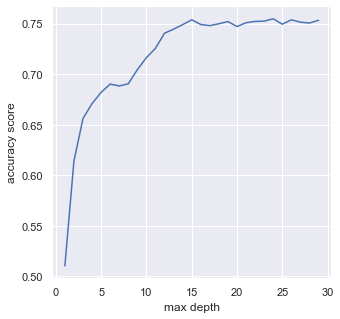

In [60]:
fig,ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'max depth', ylabel = 'accuracy score')

##### As we can see from graph above, as maximum depth increases to 15 and beyond, accuracy scores remain realatively stable at approximately 0.75.

In [61]:
acuScore = []
for i in testParam:
    acuScore.append(decTreeScore(minSamples = i))

0.7480948957584471
0.7436376707404745
0.7455068296189792
0.7498202731847592
0.7509705248023005
0.7470884255930985
0.7539899352983465
0.7492451473759885
0.7512580877066858
0.7459381739755572
0.7419122933141624
0.7426312005751258
0.7423436376707405
0.7483824586628325
0.7450754852624012
0.7436376707404745
0.7391804457225017
0.7386053199137311
0.7368799424874192
0.7354421279654925
0.7317038102084831
0.7283968368080518
0.7299784327821711
0.728253055355859
0.7276779295470884
0.7233644859813084
0.7233644859813084
0.7242271746944644
0.7262401150251617


In order to choose an optimal value for minimum samples in leaf, we plot a graph of accuracy score against minimum samples. 

[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'minimum samples in a leaf')]

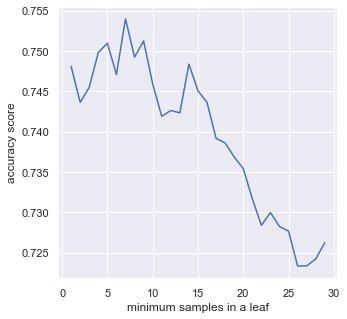

In [62]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'minimum samples in a leaf', ylabel = 'accuracy score')

##### As we can see from graph above, accuracy score is highest at 0.7539 when minimum samples=7. 

In [63]:
acuScore = []
testparam2=np.arange(2, 20, 1)
for i in np.arange(2, 20, 1):
    acuScore.append(decTreeScore( minSplit = i))

0.7480948957584471
0.7506829618979152
0.7491013659237958
0.7499640546369518
0.7485262401150251
0.7452192667145938
0.7470884255930985
0.7455068296189792
0.7457943925233644
0.7452192667145938
0.7463695183321352
0.7482386772106399
0.7489575844716032
0.7492451473759885
0.7501078360891446
0.7493889288281812
0.7529834651329979
0.7503953989935298


In order to choose an optimal value for minimum split, we plot a graph of accuracy score against minimum split. 

[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'min split')]

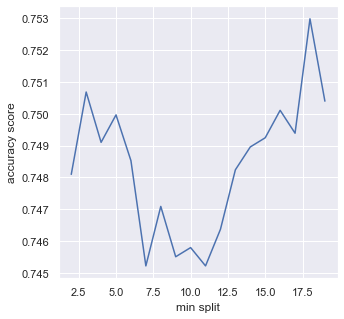

In [64]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testparam2, acuScore)
ax.set(xlabel = 'min split', ylabel = 'accuracy score')

##### As we can see from graph above, accuracy score is highest at 0.753 when minimum split=18. 

We now repeat the process above using the 'entropy' criterion.

In [65]:
decTreeScore(crit = 'entropy')

0.7644859813084112


0.7644859813084112

In [66]:
acuScore = []
for i in testParam:
    acuScore.append(decTreeScore(crit = 'entropy', maxDepth = i))

0.5104241552839683
0.6142343637670741
0.6560747663551402
0.6708842559309849
0.6747663551401869
0.6927390366642703
0.6936017253774263
0.6966211358734723
0.707117181883537
0.7095614665708123
0.723939611790079
0.7386053199137311
0.7410496046010064
0.7514018691588785
0.7521207764198419
0.7591660675772826
0.7613227893601725
0.7644859813084112
0.7679367361610352
0.7647735442127965
0.7653486700215673
0.7598849748382459
0.7607476635514019
0.7626168224299066
0.7623292595255212
0.7624730409777138
0.7629043853342918
0.7631919482386772
0.7627606038820992


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'max Depth (entropy)')]

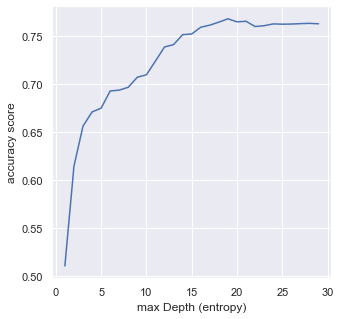

In [67]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(testParam, acuScore)
ax.set(xlabel = 'max Depth (entropy)', ylabel = 'accuracy score')

##### As we can see from graph above, accuracy score is highest at 0.7679 when maximum depth(entropy)=20

In [68]:
acuScore = []
for i in np.arange(2, 20, 1):
    acuScore.append(decTreeScore(crit = 'entropy', minSplit = i))

0.7644859813084112
0.7620416966211359
0.7640546369518332
0.7646297627606039
0.7623292595255212
0.7640546369518332
0.7594536304816679
0.7611790079079799
0.7574406901509705
0.7583033788641266
0.7574406901509705
0.7570093457943925
0.7558590941768512
0.7545650611071172
0.7545650611071172
0.7531272465851905
0.7511143062544932
0.7501078360891446


[Text(0, 0.5, 'accuracy score'), Text(0.5, 0, 'minimum samples to do a split')]

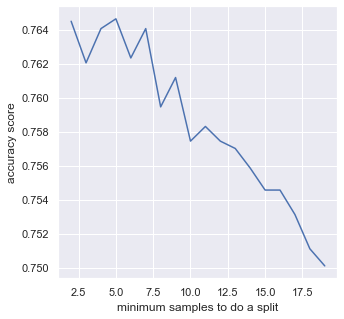

In [69]:
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(np.arange(2, 20, 1), acuScore) 
ax.set(xlabel = 'minimum samples to do a split', ylabel = 'accuracy score')

##### As we can see from graph above, accuracy score is highest at 0.7646 when minimum samples(entropy)=20

We now find out the highest accuracy score using the all parameters using the 'gini' criterion.

In [70]:
res_gini = []
for i in np.arange(1, 20, 1):
    for j in np.arange(1, 10, 1):
        for k in np.arange(2, 10, 1):
            accuracy=decTreeScore(crit = 'gini', maxDepth = i, minSamples = j, minSplit = k)
            res_gini.append({'accuracy_score':accuracy,'maxDepth':i,'minSamples':j,'minSplit':k})
acuScore_dt_gini = pd.DataFrame(res_gini)

0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552

0.6884255930984903
0.6882818116462976
0.6882818116462976
0.6882818116462976
0.6882818116462976
0.6884255930984903
0.6884255930984903
0.6884255930984903
0.6884255930984903
0.6882818116462976
0.6882818116462976
0.6882818116462976
0.6882818116462976
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.6878504672897197
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.6888569374550683
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689000718907261
0.689719626168224

0.7450754852624012
0.7450754852624012
0.7450754852624012
0.7440690150970525
0.7436376707404745
0.7452192667145938
0.7462257368799425
0.7468008626887132
0.7420560747663552
0.7420560747663552
0.7420560747663552
0.7420560747663552
0.7420560747663552
0.7423436376707405
0.7442127965492451
0.7447879223580158
0.7437814521926671
0.7437814521926671
0.7437814521926671
0.7437814521926671
0.7437814521926671
0.7437814521926671
0.7437814521926671
0.7426312005751258
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7436376707404745
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078360891
0.7433501078

0.7506829618979152
0.7506829618979152
0.7472322070452911
0.7476635514018691
0.7475197699496765
0.7499640546369518
0.7506829618979152
0.7483824586628325
0.7483824586628325
0.7483824586628325
0.7483824586628325
0.7483824586628325
0.7488138030194105
0.7514018691588785
0.7508267433501078
0.7499640546369518
0.7499640546369518
0.7499640546369518
0.7499640546369518
0.7499640546369518
0.7499640546369518
0.7499640546369518
0.7489575844716032
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7498202731847592
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7506829618979152
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7538461538461538
0.7486700215672178
0.7486700215672178
0.7486700215672178
0.7486700215672178
0.7486700215672178
0.7486700215

In [71]:
acuScore_dt_gini.sort_values('accuracy_score',ascending=False).head()

accuracy_score  maxDepth  minSamples  minSplit
1009        0.754134        15           1         3
1348        0.753846        19           7         6
1349        0.753846        19           7         7
1350        0.753846        19           7         8
1351        0.753846        19           7         9

##### From the table above, accuracy is highest at 0.7541 using criterion = 'gini', maxDepth = 15, minSamples=1, minSplit=3.

We now find out the highest accuracy score using the all parameters using the 'entropy' criterion.

In [72]:
res_entropy = []
for i in np.arange(1, 20, 1):
    for j in np.arange(1, 10, 1):
        for k in np.arange(2, 10, 1):
            accuracy=decTreeScore(crit = 'entropy', maxDepth = i, minSamples = j, minSplit = k)
            res_entropy.append({'accuracy_score':accuracy,'maxDepth':i,'minSamples':j,'minSplit':k})
acuScore_dt_entropy = pd.DataFrame(res_entropy)

0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552839683
0.5104241552

0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6936017253774263
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6938892882818116
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6943206326383896
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140905823
0.6944644140

0.7427749820273185
0.7413371675053918
0.7426312005751258
0.7417685118619698
0.7417685118619698
0.7417685118619698
0.7417685118619698
0.7427749820273185
0.7437814521926671
0.7420560747663552
0.7440690150970525
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7403306973400431
0.7409058231488138
0.7406182602444285
0.7407620416966212
0.7411933860531992
0.7411933860531992
0.7411933860531992
0.7411933860531992
0.7411933860531992
0.7411933860531992
0.7411933860531992
0.7406182602444285
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7410496046010064
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7396117900790798
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7406182602444285
0.7358734723220705
0.7358734723

0.7643421998562185
0.7618979151689432
0.7616103522645579
0.7607476635514019
0.7607476635514019
0.7607476635514019
0.7584471603163192
0.7591660675772826
0.7613227893601725
0.7588785046728972
0.7613227893601725
0.7580158159597412
0.7580158159597412
0.7580158159597412
0.7580158159597412
0.7580158159597412
0.7600287562904385
0.7577282530553558
0.7580158159597412
0.7583033788641266
0.7583033788641266
0.7583033788641266
0.7583033788641266
0.7583033788641266
0.7583033788641266
0.7583033788641266
0.7565780014378145
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7501078360891446
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7482386772106399
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7554277498202732
0.7496764917325665
0.7496764917

In [73]:
acuScore_dt_entropy.sort_values('accuracy_score',ascending=False).head()

accuracy_score  maxDepth  minSamples  minSplit
1227        0.768656        18           1         5
1299        0.768224        19           1         5
1296        0.767937        19           1         2
1226        0.766930        18           1         4
1298        0.766355        19           1         4

##### From the table above, accuracy is highest at 0.7686 using criterion = 'entropy', maxDepth = 18, minSamples=1, minSplit=5.

##### In conclusion, comparing the accuracy scores for both the 'gini' and 'entropy' criteria, 'entropy' criterion with          maxDepth = 18, minSamples=1, minSplit=5 is the best combination of hyperparameters for DecisionTree where accuracy=0.7686.

In [74]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 18, min_samples_leaf = 1, min_samples_split = 5, random_state= 0) 
t0=time()
dt.fit(x_train, y_train) # train our model
dt_time=time()-t0
print('Duration of training : %0.4f s' % dt_time)

dt_y_pred = dt.predict(x_test) # let the model predict the test data
dt_accuracy_score=accuracy_score(y_test, dt_y_pred)
print('accuracy_score:',dt_accuracy_score)

Duration of training : 0.1592 s
accuracy_score: 0.7686556434219985


In [75]:
for i in range(25):
    print(y_pred[i])

0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
1.0
1.0
0.0
2.0
2.0
0.0
1.0
0.0
0.0
2.0
2.0


In [76]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))

### Random Forest

In [77]:
n_trees = np.arange(1, 150, 4) 
acuScore_rf=[]

for n in n_trees:
    rdf = RandomForestClassifier(n_estimators = n,random_state= 0)
    rdf.fit(x_train, y_train)
    
    y_pred = rdf.predict(x_test)
    accuracy_score_rf=accuracy_score(y_test, y_pred)
    
    acuScore_rf.append({'n_estimators':n,'accuracy_score':accuracy_score_rf})
    print(n,accuracy_score_rf)
acuScore_random_forest = pd.DataFrame(acuScore_rf)

1 0.7319913731128684
5 0.7746944644140906
9 0.7843278217109992
13 0.7893601725377426
17 0.7929547088425594
21 0.7946800862688713
25 0.7925233644859813
29 0.794392523364486
33 0.7972681524083394
37 0.800431344356578
41 0.7997124370956147
45 0.7992810927390367
49 0.8007189072609633
53 0.8001437814521927
57 0.7992810927390367
61 0.798274622573688
65 0.7981308411214953
69 0.7985621854780733
73 0.8002875629043853
77 0.8007189072609633
81 0.8015815959741194
85 0.800431344356578
89 0.8007189072609633
93 0.8007189072609633
97 0.8007189072609633
101 0.7995686556434219
105 0.800431344356578
109 0.799137311286844
113 0.8
117 0.7988497483824587
121 0.7992810927390367
125 0.799137311286844
129 0.7988497483824587
133 0.7988497483824587
137 0.7995686556434219
141 0.7992810927390367
145 0.7995686556434219
149 0.7994248741912293


In [78]:
acuScore_random_forest.sort_values('accuracy_score',ascending=False).head()

accuracy_score  n_estimators
20        0.801582            81
19        0.800719            77
24        0.800719            97
23        0.800719            93
22        0.800719            89

##### n_estimators=81 produces the best result random forest with accuracy 0.8015.

##### Compared to a single decision tree, Random Forest tends to not overfit. When n = 81, the accuracy is the highest, thus using 81 trees would be good. We would want a large number of trees when there are many features, so that the noise can be reduced to minimum.

In [79]:
clf = RandomForestClassifier(n_estimators=81,random_state= 0)
t0=time()
clf.fit(x_train, y_train) 
rf_time=time()-t0
print('Duration of training : %0.4f s' % rf_time)

rf_y_pred = clf.predict(x_test) 
rf_accuracy_score=accuracy_score(y_test, rf_y_pred)
print('accuracy_score:',rf_accuracy_score)

Duration of training : 3.4478 s
accuracy_score: 0.8015815959741194


We now compare the highest accuracy scores and training times across all supervised models.

In [80]:
d = {'Logistic Regression': [0.5754133716750539,0.0538], 'Support Vector Machine': [svm_accuracy_score, svm_time ],'K-Nearest-Neighbour': [knn_accuracy_score, knn_time ],'Decision Tree': [dt_accuracy_score, dt_time],'Random Forest': [rf_accuracy_score, rf_time]}
df = pd.DataFrame(data=d,index=['Accuracy score','Duration of training(s)'])
df

Logistic Regression  Support Vector Machine  \
Accuracy score                      0.575413                0.742775   
Duration of training(s)             0.053800               96.026083   

                         K-Nearest-Neighbour  Decision Tree  Random Forest  
Accuracy score                      0.744644       0.768656       0.801582  
Duration of training(s)             0.024800       0.159217       3.447828

##### From the table above, Random Forest has the highest accuracy score of 0.8015, training duration=3.871s. Logistic regression has the lowest accuracy score of 0.5754, training duration=0.0538s. Support Vector Machine has the the longest training duration of 142.9s. 

### In conclusion, after balancing the data, our predicted y-values are more evenly spread across the 3 different categories. Across the different supervised models, Random Forest produces the best result with the highest accuracy score of 0.8016.

# Additional exploration

#### Since Random Forest has the highest accuracy score, we have decided to apply PCA as well as LDA for data visualisation.

## PCA with Random Forest

In [81]:
rdf = RandomForestClassifier(n_estimators = 81,random_state= 0)
rdf.fit(x_train, y_train)

y_pred = rdf.predict(x_test) # let the model predict the test data
accuracy_score(y_test, y_pred)

0.8015815959741194

In [82]:
for i in range(25):
    print(y_pred[i])

1.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
2.0
0.0
2.0
2.0
1.0
1.0
2.0
1.0
0.0
2.0
0.0
2.0
0.0
1.0
1.0
2.0


In [83]:
from sklearn.decomposition import PCA as RandomizedPCA
n_components=2

pca=RandomizedPCA(n_components=n_components,whiten=True).fit(x_train)
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)


### Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

Together, the first two principal components contain 59.86% of the information. The first principal component contains 38.53% of the variance and the second principal component contains 21.32% of the variance

In [84]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.38538217 0.21329542]
0.5986775887986262


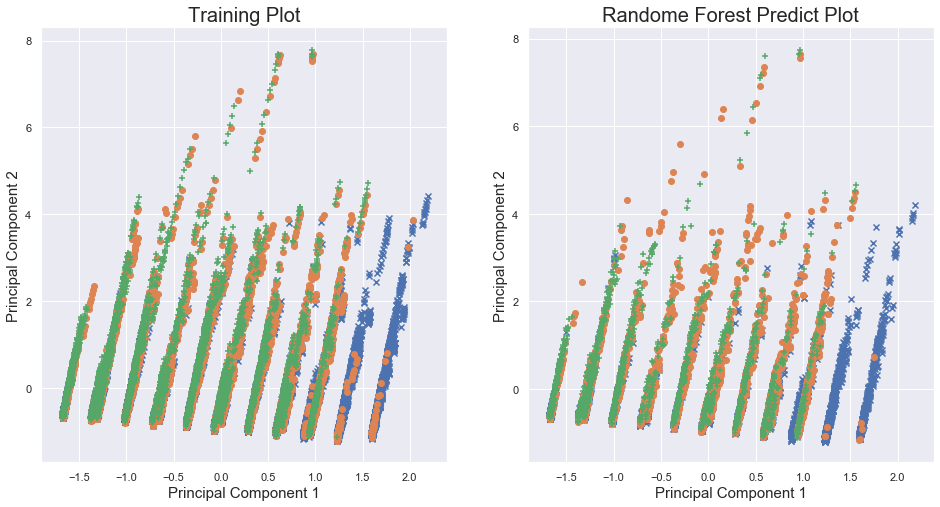

In [85]:
train_data=pd.DataFrame(x_train_pca,columns=['col_1','col_2'])
y_train_data=pd.DataFrame(y_train,columns=['result'])
train_data_pca=pd.concat([train_data,y_train_data],axis=1)

df_zero = train_data_pca[train_data_pca['result'] == 0]
df_one = train_data_pca[train_data_pca['result'] == 1]
df_two = train_data_pca[train_data_pca['result'] == 2]


fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.scatter(df_zero['col_1'],df_zero['col_2'], marker = 'x')
ax1.scatter(df_one['col_1'],df_one['col_2'], marker = 'o')
ax1.scatter(df_two['col_1'],df_two['col_2'], marker = '+')

ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('Training Plot', fontsize = 20)


test_data=pd.DataFrame(x_test_pca,columns=['col_1','col_2'])
y_pred_data=pd.DataFrame(y_pred,columns=['predict'])
test_data_pca=pd.concat([test_data,y_pred_data],axis=1)

df_zero_pred = test_data_pca[test_data_pca['predict'] == 0]
df_one_pred = test_data_pca[test_data_pca['predict'] == 1]
df_two_pred = test_data_pca[test_data_pca['predict'] == 2]

ax2 = fig.add_subplot(1,2,2) 
ax2.scatter(df_zero_pred['col_1'],df_zero_pred['col_2'], marker = 'x')
ax2.scatter(df_one_pred['col_1'],df_one_pred['col_2'], marker = 'o')
ax2.scatter(df_two_pred['col_1'],df_two_pred['col_2'], marker = '+')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('Randome Forest Predict Plot', fontsize = 20)

plt.show()

##### From the graphs above, we can see that our predicted PCA graph is similar to the trained PCA graph.

## LDA with Random Forest

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_train = LDA(n_components=2)  
lda_train_result = lda_train.fit_transform(x_train,y=y_train)  

ldaDf_train = pd.DataFrame(data = lda_train_result
             , columns = ['col_1', 'col_2'])

lda_test = LDA(n_components=2)  
lda_test_result = lda_test.fit_transform(x_test,y=y_test)  

ldaDf_test = pd.DataFrame(data = lda_test_result
             , columns = ['col_1', 'col_2'])

Together, the first two principal components contain 100% of the information. The first principal component contains 92.711% of the variance and the second principal component contains 7.288% of the variance. Error variance of LDA is higher than PCA. 

In [87]:
print(lda_train.explained_variance_ratio_)

print(lda_train.explained_variance_ratio_.sum())

[0.927118 0.072882]
1.0


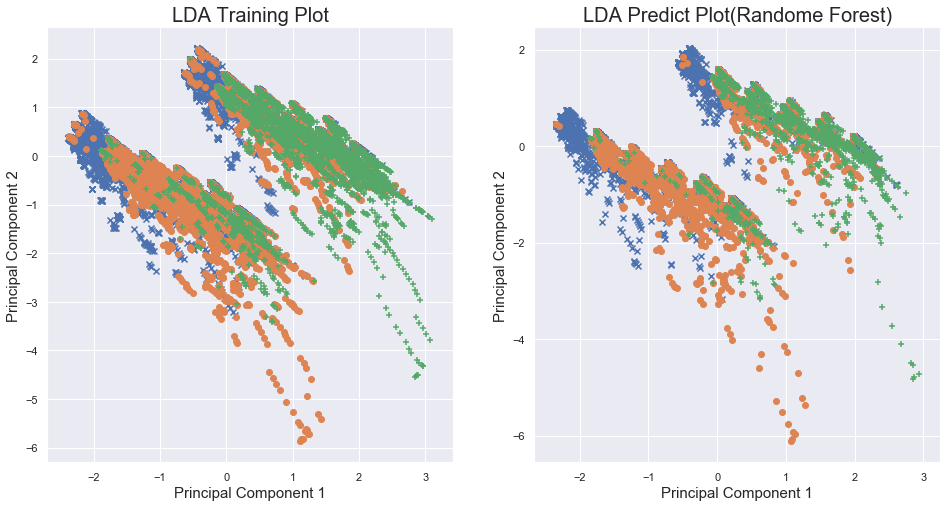

In [88]:
y_train_data=pd.DataFrame(y_train,columns=['result'])
train_data_lda=pd.concat([ldaDf_train,y_train_data],axis=1)

df_zero_lda = train_data_lda[train_data_lda['result'] == 0]
df_one_lda = train_data_lda[train_data_lda['result'] == 1]
df_two_lda = train_data_lda[train_data_lda['result'] == 2]


fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.scatter(df_zero_lda['col_1'],df_zero_lda['col_2'], marker = 'x')
ax1.scatter(df_one_lda['col_1'],df_one_lda['col_2'], marker = 'o')
ax1.scatter(df_two_lda['col_1'],df_two_lda['col_2'], marker = '+')

ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('LDA Training Plot', fontsize = 20)


y_pred_data=pd.DataFrame(y_pred,columns=['predict'])
pred_data_lda=pd.concat([ldaDf_test,y_pred_data],axis=1)

df_zero_lda2 = pred_data_lda[pred_data_lda['predict'] == 0]
df_one_lda2 = pred_data_lda[pred_data_lda['predict'] == 1]
df_two_lda2 = pred_data_lda[pred_data_lda['predict'] == 2]

ax2 = fig.add_subplot(1,2,2) 
ax2.scatter(df_zero_lda2['col_1'],df_zero_lda2['col_2'], marker = 'x')
ax2.scatter(df_one_lda2['col_1'],df_one_lda2['col_2'], marker = 'o')
ax2.scatter(df_two_lda2['col_1'],df_two_lda2['col_2'], marker = '+')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('LDA Predict Plot(Randome Forest)', fontsize = 20)

plt.show()

##### From the graphs above, we can see that our predicted LDA graph is similar to the trained LDA graph.